#### Weeks 1 & 2
#### McKenzie Payne
### Assignment 1.2: Charts

### Black Board Instructions: 
#### 1 bar chart, 1 stacked bar chart, 1 pie chart, 1 donut, and 1 line chart with Tableau or PowerBI 
#### 1 bar chart, 1 stacked bar chart, 1 pie chart, 1 donut, and 1 line chart with Python
#### 1 bar chart, 1 stacked bar chart, 1 pie chart, 1 donut, and 1 line chart with R

### Using R:

#### Load necessary libraries

In [1]:
library(readxl)  # For reading Excel files
library(ggplot2)  # For plotting
library(dplyr)  # For data manipulation
library(tidyr)  # For reshaping data

Warning message:
"package 'readxl' was built under R version 4.3.1"
Warning message:
"package 'ggplot2' was built under R version 4.3.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




#### Paths to the data files

In [2]:
obama_approval_path <- "C:/Users/mcken/Downloads/obama-approval-ratings.xls"
hotdog_places_path <- "C:/Users/mcken/Downloads/hotdog-places.xlsm"
hotdog_winners_path <- "C:/Users/mcken/Downloads/hotdog-contest-winners.xlsm"

#### Load the data into R data frames

In [3]:
obama_approval <- read_excel(obama_approval_path)
hotdog_places <- read_excel(hotdog_places_path)
hotdog_winners <- read_excel(hotdog_winners_path)

#### Display the first few rows of each dataset

In [4]:
cat("Obama Approval Ratings Data:\n")
print(head(obama_approval))
cat("\nHotdog Places Data:\n")
print(head(hotdog_places))
cat("\nHotdog Winners Data:\n")
print(head(hotdog_winners))

Obama Approval Ratings Data:
# A tibble: 6 × 4
  Issue           Approve Disapprove  None
  <chr>             <dbl>      <dbl> <dbl>
1 Race Relations       52         38    10
2 Education            49         40    11
3 Terrorism            48         45     7
4 Energy Policy        47         42    11
5 Foreign Affairs      44         48     8
6 Environment          43         51     6

Hotdog Places Data:
# A tibble: 3 × 11
  `2000` `2001` `2002` `2003` `2004` `2005` `2006` `2007` `2008` `2009` `2010`
   <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>
1     25   50     50.5   44.5   53.5     49     54     66     59   68       54
2     24   31     26     30.5   38       37     52     63     59   64.5     43
3     22   23.5   25.5   29.5   32       32     37     49     42   55       37

Hotdog Winners Data:
# A tibble: 6 × 5
   Year Winner                       `Dogs eaten` Country       `New record`
  <dbl> <chr>                               <dbl> <chr>  

#### Bar Chart

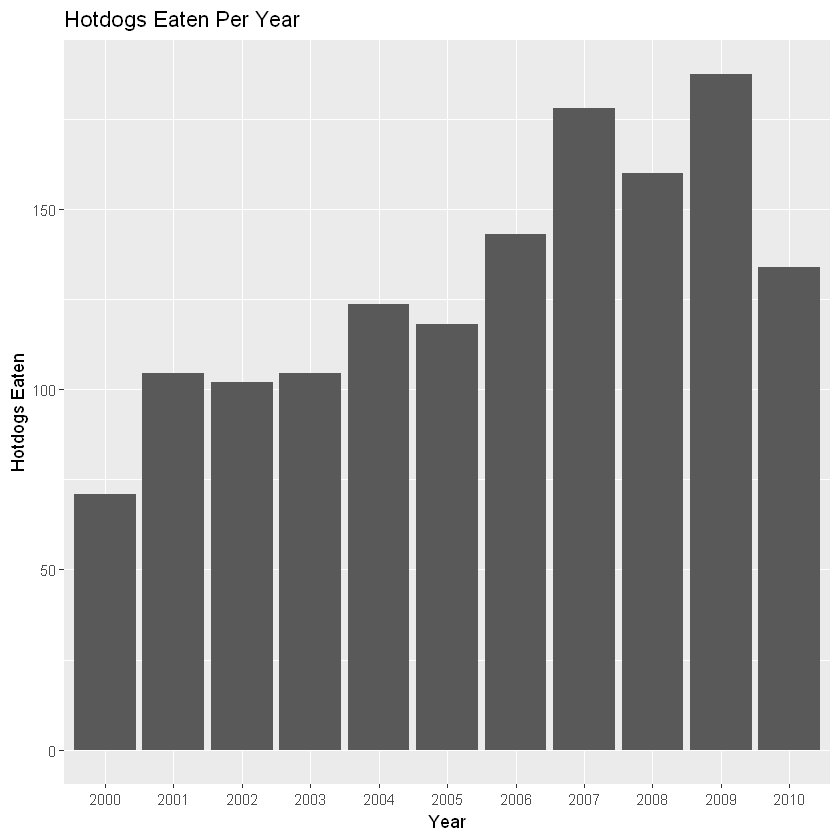

In [5]:
# Reshape the hotdog_places data from wide to long format
hotdog_places_long <- hotdog_places %>%
  pivot_longer(cols = everything(), names_to = "Year", values_to = "HotdogsEaten")

# Create bar plot
ggplot(hotdog_places_long, aes(x = Year, y = HotdogsEaten)) +
  geom_bar(stat = "identity") +
  ggtitle('Hotdogs Eaten Per Year') +  # Set title
  xlab('Year') +  # Set x-axis label
  ylab('Hotdogs Eaten')  # Set y-axis label

#### Stacked Bar Chart

In [6]:
# Add dummy 'BunsEaten' data
hotdog_places_long <- hotdog_places_long %>%
  mutate(BunsEaten = HotdogsEaten * 0.8)

#### Create stacked bar plot

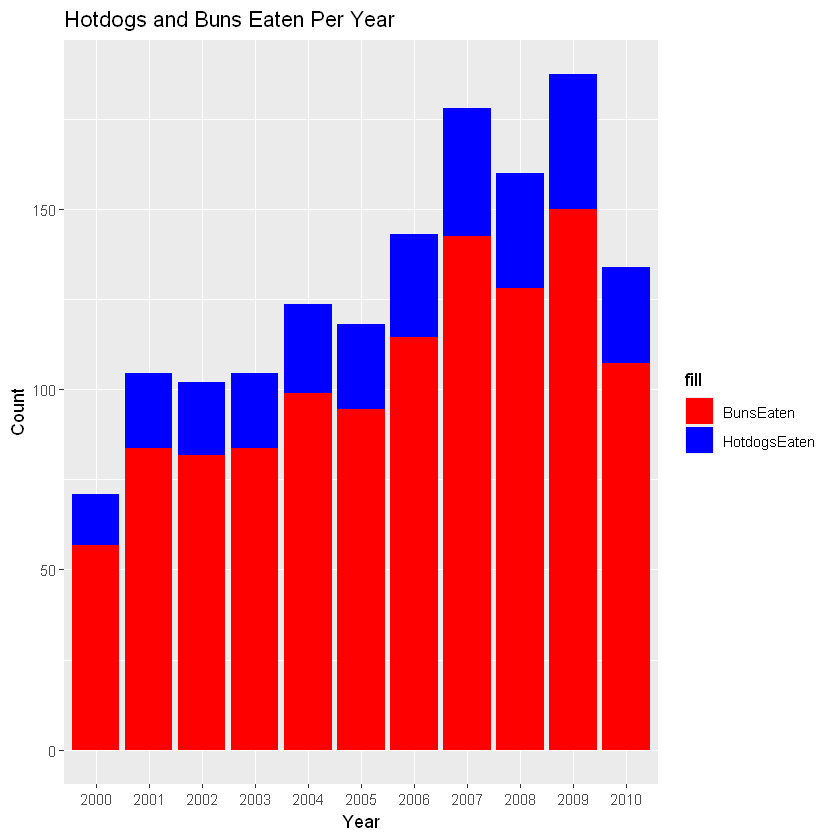

In [7]:
ggplot(hotdog_places_long, aes(x = Year, y = HotdogsEaten, fill = "HotdogsEaten")) +
  geom_bar(stat = "identity") +
  geom_bar(aes(y = BunsEaten, fill = "BunsEaten"), stat = "identity") +
  ggtitle('Hotdogs and Buns Eaten Per Year') +  # Set title
  xlab('Year') +  # Set x-axis label
  ylab('Count') +  # Set y-axis label
  scale_fill_manual(values = c("HotdogsEaten" = "blue", "BunsEaten" = "red"))  # Set fill colors

#### Pie Chart

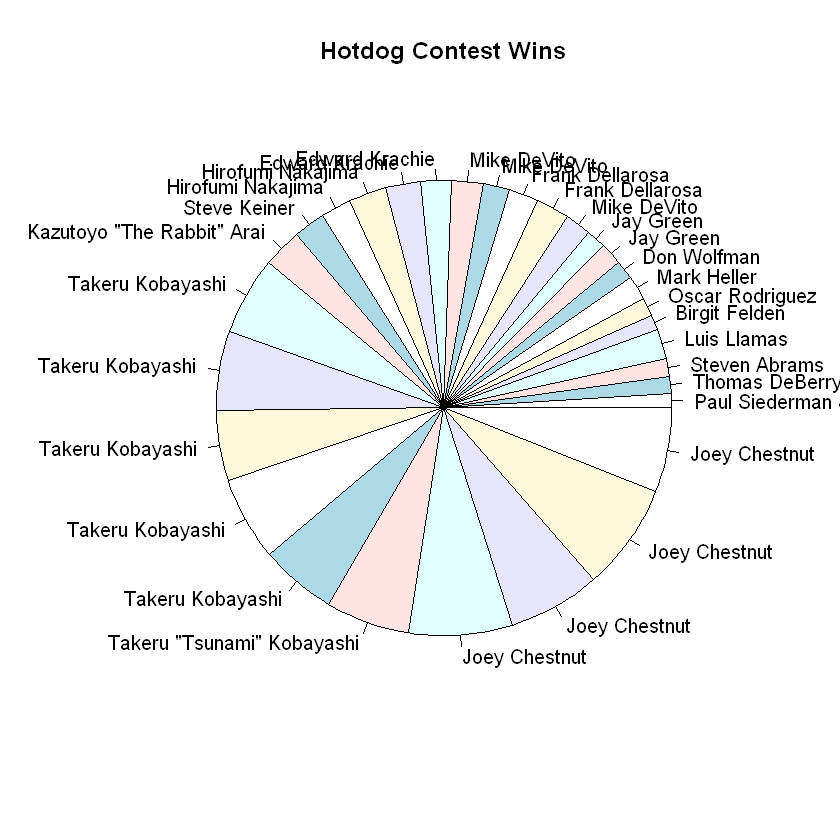

In [8]:
pie(hotdog_winners$`Dogs eaten`, labels = hotdog_winners$Winner, main = "Hotdog Contest Wins")  # Set title

#### Create donut chart

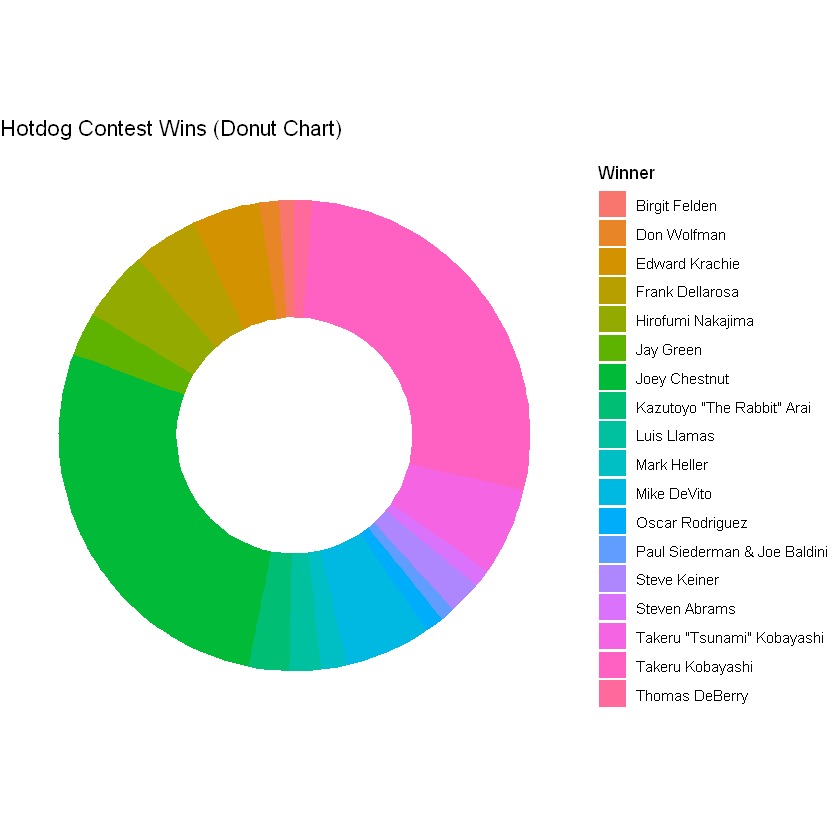

In [9]:
# Prepare data for donut chart
donut_data <- hotdog_winners %>%
  mutate(fraction = `Dogs eaten` / sum(`Dogs eaten`))

ggplot(donut_data, aes(x = 2, y = fraction, fill = Winner)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar(theta = "y") +
  xlim(0.5, 2.5) +
  ggtitle('Hotdog Contest Wins (Donut Chart)') +  # Set title
  theme_void()  # Remove background and axes

#### Create line chart

Issue,Approval_Status,Percentage
<chr>,<chr>,<dbl>
Race Relations,Approve,52
Race Relations,Disapprove,38
Race Relations,None,10
Education,Approve,49
Education,Disapprove,40
Education,None,11


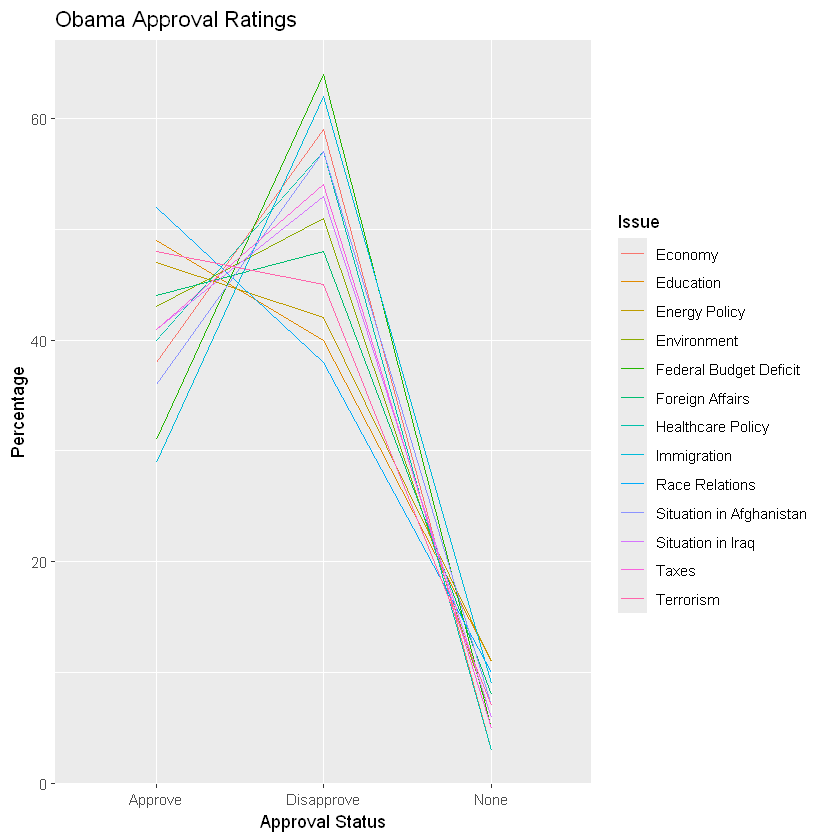

In [15]:
# Reshape data from wide to long format
obama_approval_long <- pivot_longer(obama_approval, 
                                    cols = -Issue, 
                                    names_to = "Approval_Status", 
                                    values_to = "Percentage")

# Print the first few rows of the reshaped data to verify its structure
head(obama_approval_long)

# Create the line chart
ggplot(obama_approval_long, aes(x = Approval_Status, y = Percentage, color = Issue, group = Issue)) +
  geom_line() +
  ggtitle('Obama Approval Ratings') +
  xlab('Approval Status') +
  ylab('Percentage')